# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
<br>
Description: Visualize power by time over trials<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 
- PyEEG http://pyeeg.sourceforge.net/ 


## Imports

In [1]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [2]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername=filename_foldername_dict["foldername"]
filename=filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)

P005 participant_P005_exp001_block_long


In [3]:
filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"

filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)

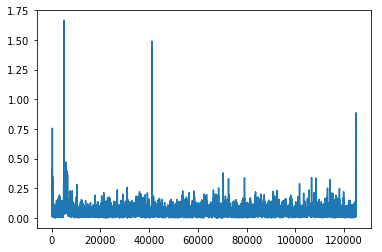

In [10]:
eeg = filtered_cleaned_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['right_eeg']]
amp_right = amp_by_time(eeg, 250, alpha)

eeg = filtered_cleaned_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['left_eeg']]
amp_left = amp_by_time(eeg, 250, alpha)

amp_avg = np.mean([amp_right, amp_left], axis=0)
diff_avg = amp_right - amp_left



In [21]:
right_eeg = filtered_cleaned_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['right_eeg']]
amp_right_theta = amp_by_time(eeg, 250, theta)

left_eeg = filtered_cleaned_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['left_eeg']]
amp_left_theta = amp_by_time(eeg, 250, theta)

amp_avg_theta = np.mean([amp_right_theta, amp_left_theta], axis=0)
diff_avg_theta = amp_right_theta - amp_left_theta



KeyboardInterrupt: 

In [13]:
# Get sections
numSections = getNumSections(filtered_cleaned_data)
article_sections = list()
for i in range(numSections) : 
    article_sections.append(getArticleSectionData("response", i, filtered_cleaned_data))


In [ ]:
timestamps = filtered_cleaned_data[StreamType.EEG.value][StreamType.TIME.value]

plt.plot(timestamps, amp_avg_theta)

section_number = 1
for section in article_sections: 
    time_data = section[StreamType.EEG.value][StreamType.TIME.value]
    line = [0]*(time_data)
    plt.plot(time_data, line, linewidth=7.0, label="section " + str(section_number))
    section_number += 1
plt.legend()
plt.title("Alpha Power over time")
plt.ylabel("power")
plt.xlabel("time (s)")
plt.show()

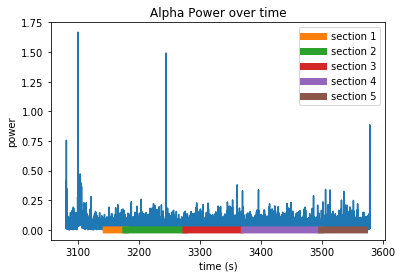

In [20]:
timestamps = filtered_cleaned_data[StreamType.EEG.value][StreamType.TIME.value]

plt.plot(timestamps, amp_right)

section_number = 1
for section in article_sections: 
    time_data = section[StreamType.EEG.value][StreamType.TIME.value]
    line = [0]*(time_data)
    plt.plot(time_data, line, linewidth=7.0, label="section " + str(section_number))
    section_number += 1
plt.legend()
plt.title("Alpha Power over time")
plt.ylabel("power")
plt.xlabel("time (s)")
plt.show()

In [5]:
unfocused_state = getSmoothedPerformance((df["is_pressed"] == False) & (df["is_target"] == True), 10, 3)
unfocused_df = df[unfocused_state]
focused_df = df[np.logical_not(unfocused_state)]
print("alpha")
compareDFs([ unfocused_df, focused_df],[ "unfocused", "focused"], band=alpha, data_type="data_extended")
print("theta")
compareDFs([ unfocused_df, focused_df],[ "unfocused", "focused"], band=theta, data_type="data_extended")


alpha
unfocused len: 93
focused len: 267


KeyError: 'eeg'

In [ ]:
correct_df = df[(df["is_pressed"] == True) & (df["is_target"] == True)] 
missed_df = df[(df["is_pressed"] == False) & (df["is_target"] == True)] 
print("alpha")
compareDFs([df, correct_df, missed_df],["all", "correct", "missed"], band=alpha, data_type="data_extended")
print("theta")
compareDFs([df, correct_df, missed_df],["all", "correct", "missed"], band=theta, data_type="data_extended")


In [ ]:
slow_react_df = df[(df["is_pressed"] == True) & (df["is_target"] == True) & (df["reaction_time"] > 0.6)] 
fast_react_df = df[(df["is_pressed"] == True) & (df["is_target"] == True) & (df["reaction_time"] < 0.6)] 
print("alpha")
compareDFs([df, slow_react_df, fast_react_df],["all", "slow", "fast"], band=alpha, data_type="data_extended")
print("theta")
compareDFs([df, slow_react_df, fast_react_df],["all", "slow", "fast"], band=theta, data_type="data_extended")


In [ ]:
meme_df = df[(df["has_meme"] == True)]
nomeme_df = df[(df["has_meme"] == False)]
print("alpha")
compareDFs([df, meme_df, nomeme_df],["all", "meme", "nomeme"], band=alpha, data_type="data_extended" )
print("theta")
compareDFs([df, meme_df, nomeme_df],["all", "meme", "nomeme"], band=theta, data_type="data_extended" )


In [ ]:
error_df = df[(df["points"] < 0)]
good_df = df[(df["points"] > 0)]
print("alpha")
compareDFs([df, error_df, good_df],["all", "error", "good"], band=alpha, data_type="data_extended" )
print("theta")
compareDFs([df, error_df, good_df],["all", "error", "good"], band=theta, data_type="data_extended" )

